## Throw darts in a circle inscribed in a square

* Probability of hitting the circle: $\pi/4$ 

In [57]:
import timeit
import numpy as np
from scipy.stats import bernoulli
from matplotlib import pyplot as plt

In [10]:
r = 1
l = 2

In [21]:
itts = 1_000_000
count  = 0

starttime = timeit.default_timer()

for itt in range(itts):
    point = np.random.uniform(-1, 1, 2)
        
    if np.linalg.norm(point) < r:
        count += 1        

print("The time difference is : {} sec".format(timeit.default_timer() - starttime))        

The time difference is : 6.34565963399973 sec


In [20]:
print('Theoretical probability: {}'.format(np.pi / 4))        
print('Monte Carlo probability: {}'.format(count / itts))        

Theoretical probability: 0.7853981633974483
Monte Carlo probability: 0.785281


## A Game

* Probability of win: $p$
* If lose 2 in a row: Game over
* Expected number of rounds

### Solution

$e = (1 + e) \times p + (2) \times (1 - p)^2 + (2 + e) \times (1 - p) \times p$

$\Rightarrow e=\frac{2 - p}{(1 - p)^2}$


In [90]:
itts = 1_000_000
p = .75

rounds = []

starttime = timeit.default_timer()       

for itt in range(itts):
    nloss = 0
    nround = 0
    
    while nloss < 2:       
        nround += 1

        # Use Bernoulli pdf
        #rnd = np.random.binomial(1, p, 1)[0]
        #rnd = bernoulli.rvs(p=p, size=1)[0]
        #if (rnd == 0):
        #    nloss += 1
        #else:
        #    nloss = 0
        
        # Use Uniform pdf
        rnd = np.random.uniform()
        if rnd < p:
            nloss = 0
        else:
            nloss += 1        
        
    rounds.append(nround)   

print("The time difference is : {} sec".format(timeit.default_timer() - starttime))        

The time difference is : 40.2745097779989 sec


(array([2.80769e+05, 1.97600e+05, 1.22407e+05, 1.09825e+05, 6.80930e+04,
        6.06430e+04, 3.75490e+04, 3.40750e+04, 2.06610e+04, 1.88230e+04,
        1.15890e+04, 1.04690e+04, 7.55400e+03, 4.74000e+03, 4.14300e+03,
        2.60600e+03, 2.30200e+03, 1.49300e+03, 1.33100e+03, 7.94000e+02,
        7.20000e+02, 4.41000e+02, 3.57000e+02, 2.46000e+02, 2.06000e+02,
        1.61000e+02, 1.12000e+02, 7.80000e+01, 4.60000e+01, 4.70000e+01,
        2.80000e+01, 2.50000e+01, 1.70000e+01, 1.60000e+01, 8.00000e+00,
        8.00000e+00, 4.00000e+00, 1.00000e+00, 2.00000e+00, 4.00000e+00,
        2.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  2.  ,   7.54,  13.08,  18.62,  24.16,  29.7 ,  35.24,  40.78,
         46.32,  51.86,  57.4 ,  62.94,  68.48,  74.02,  79.56,  85.1 ,
         90.64,  96.18, 101.72, 107.26, 112.8 , 118.34, 123.88, 129.42,
        134.96, 140.5 , 146.04, 151.58, 157.12, 162.

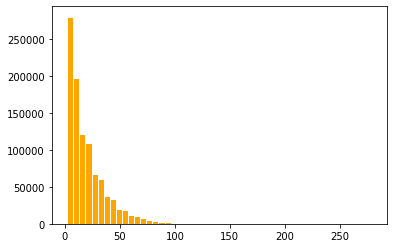

In [91]:
plt.hist(rounds, bins=50, color='orange', edgecolor='white')

In [92]:
print('Theoretical expectated value: {}'.format((2 - p) / (1 - p) ** 2))
print('Monte Carlo expectated value: {}'.format(np.mean(rounds)))

Theoretical expectated value: 20.0
Monte Carlo expectated value: 20.028513
